In [104]:
from random import seed
from random import randrange
import csv

In [105]:
csv_reader = csv.reader(open('./insurance.csv'))
dataset = list(csv_reader)

In [106]:
dataset[:10]

[['X', 'Y'],
 ['108', '392.5'],
 ['19', '46.2'],
 ['13', '15.7'],
 ['124', '422.2'],
 ['40', '119.4'],
 ['57', '170.9'],
 ['23', '56.9'],
 ['14', '77.5'],
 ['45', '214']]

In [107]:
dataset = dataset[1:]
#dataset

In [108]:
# Convert string column to float
for i in range(len(dataset)):
    for x in range(len(dataset[0])):
        dataset[i][x] = float(dataset[i][x])

In [109]:
dataset[:10]
#dataset

[[108.0, 392.5],
 [19.0, 46.2],
 [13.0, 15.7],
 [124.0, 422.2],
 [40.0, 119.4],
 [57.0, 170.9],
 [23.0, 56.9],
 [14.0, 77.5],
 [45.0, 214.0],
 [10.0, 65.3]]

In [110]:
import matplotlib.pyplot as plt
import matplotlib

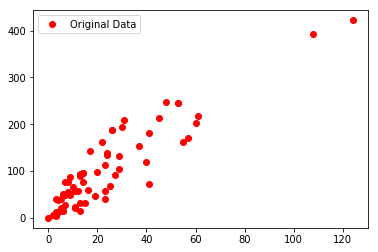

In [111]:
plt.plot([row[0] for row in dataset],[row[-1] for row in dataset],'ro',label='Original Data')
plt.legend()
plt.show()

In [112]:
split = 0.6
train = list()
train_size = split*len(dataset)
dataset_copy = list(dataset)
#dataset_copy

In [113]:
while len(train) < train_size:
    index = randrange(len(dataset_copy))
    train.append(dataset_copy.pop(index))

In [114]:
#train  --> randrange로 random 하게 추출된 tarin데이터 list

In [115]:
#dataset_copy --> train데이터가 추출되고 남은 데이터 list

In [116]:
dataset[0][0]
dataset[0][1]

392.5

In [117]:
test_list = []
for row in dataset:
    copy = [row[0],None]
    test_list.append(copy)
test_list    

[[108.0, None],
 [19.0, None],
 [13.0, None],
 [124.0, None],
 [40.0, None],
 [57.0, None],
 [23.0, None],
 [14.0, None],
 [45.0, None],
 [10.0, None],
 [5.0, None],
 [48.0, None],
 [11.0, None],
 [23.0, None],
 [7.0, None],
 [2.0, None],
 [24.0, None],
 [6.0, None],
 [3.0, None],
 [23.0, None],
 [6.0, None],
 [9.0, None],
 [9.0, None],
 [3.0, None],
 [29.0, None],
 [7.0, None],
 [4.0, None],
 [20.0, None],
 [7.0, None],
 [4.0, None],
 [0.0, None],
 [25.0, None],
 [6.0, None],
 [5.0, None],
 [22.0, None],
 [11.0, None],
 [61.0, None],
 [12.0, None],
 [4.0, None],
 [16.0, None],
 [13.0, None],
 [60.0, None],
 [41.0, None],
 [37.0, None],
 [55.0, None],
 [41.0, None],
 [11.0, None],
 [27.0, None],
 [8.0, None],
 [3.0, None],
 [17.0, None],
 [13.0, None],
 [13.0, None],
 [15.0, None],
 [8.0, None],
 [29.0, None],
 [30.0, None],
 [24.0, None],
 [9.0, None],
 [31.0, None],
 [14.0, None],
 [53.0, None],
 [26.0, None],
 [14.0, None],
 [53.0, None],
 [26.0, None]]

In [118]:
#test_list --> 모델을 validation할 test 데이터 list

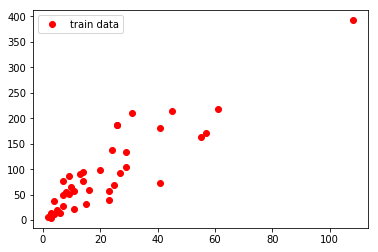

In [119]:
plt.plot([row[0] for row in train],[row[1] for row in train],'ro',label='train data')
plt.legend()
plt.show()

In [120]:
def mean(values):
    return float(sum(values))/len(values)

#Covariance 실제 Formula랑 다른 이유는 뭘까?
def covariance(x, mean_x, y, mean_y):
    cova = 0.0
    for i in range(len(x)):
        cova += (x[i]-mean_x)*(y[i]-mean_y)
    return cova/(len(x)-1)    

def variance(x, mean_x):
    var = 0.0
    for i in range(len(x)):
        var += (x[i]-mean_x)**2
    return var/(len(x)-1) 

def coefficient(dataset):
    x= [row[0] for row in dataset]
    y= [row[1] for row in dataset]
    mean_x = mean(x)
    mean_y = mean(y)
    coef = covariance(x,mean_x,y,mean_y) / variance(x,mean_x)
    return coef

In [121]:
x= [row[0] for row in train]
y= [row[1] for row in train]
mean_x = mean(x)
mean_y = mean(y)
a = mean_y - coefficient(train)*mean_x
b = coefficient(train)

In [122]:
predicted = list()
test_list

[[108.0, None],
 [19.0, None],
 [13.0, None],
 [124.0, None],
 [40.0, None],
 [57.0, None],
 [23.0, None],
 [14.0, None],
 [45.0, None],
 [10.0, None],
 [5.0, None],
 [48.0, None],
 [11.0, None],
 [23.0, None],
 [7.0, None],
 [2.0, None],
 [24.0, None],
 [6.0, None],
 [3.0, None],
 [23.0, None],
 [6.0, None],
 [9.0, None],
 [9.0, None],
 [3.0, None],
 [29.0, None],
 [7.0, None],
 [4.0, None],
 [20.0, None],
 [7.0, None],
 [4.0, None],
 [0.0, None],
 [25.0, None],
 [6.0, None],
 [5.0, None],
 [22.0, None],
 [11.0, None],
 [61.0, None],
 [12.0, None],
 [4.0, None],
 [16.0, None],
 [13.0, None],
 [60.0, None],
 [41.0, None],
 [37.0, None],
 [55.0, None],
 [41.0, None],
 [11.0, None],
 [27.0, None],
 [8.0, None],
 [3.0, None],
 [17.0, None],
 [13.0, None],
 [13.0, None],
 [15.0, None],
 [8.0, None],
 [29.0, None],
 [30.0, None],
 [24.0, None],
 [9.0, None],
 [31.0, None],
 [14.0, None],
 [53.0, None],
 [26.0, None],
 [14.0, None],
 [53.0, None],
 [26.0, None]]

In [123]:
for row in test_list:
    yhat = a + b * row[0]
    predicted.append(yhat)

In [124]:
len(predicted)

66

In [126]:
#predicted

In [127]:
actual = [row[-1] for row in dataset]

In [130]:
print(predicted[:10], actual[:10])

[383.9382323680654, 82.91246873873185, 62.61859703338352, 438.0552235823276, 153.941019707451, 211.4403228726046, 96.4417165422974, 66.0009089842749, 170.85257946190794, 52.471661180709354] [392.5, 46.2, 15.7, 422.2, 119.4, 170.9, 56.9, 77.5, 214.0, 65.3]


In [132]:
sum_error = 0
for i in range(len(actual)):
    predict_error = predicted[i] - actual[i]
    sum_error += (predict_error)**2
mean_error =  float(sum_error) / len(actual)
cost = mean_error

In [138]:
print('cost: %.3f' % (cost))

cost: 1343.884


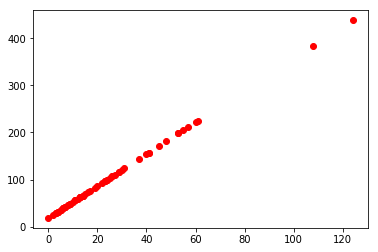

In [141]:
# Linear Regerssion으로 예측된 prected data plot
plt.plot([row[0] for row in test_list],[row for row in predicted],'ro',label='predicted yhat')

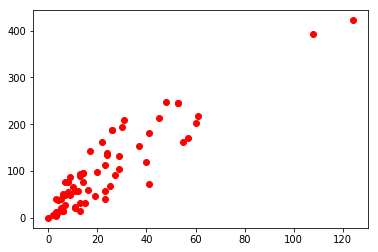

In [142]:
# 실제 data plot
plt.plot([row[0] for row in dataset],[row[1] for row in dataset],'ro',label='predicted yhat')